In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission_NDF.csv', 'age_gender_bkts.csv', 'sessions.csv', 'train_users_2.csv', 'test_users.csv', 'countries.csv', 'sample_submission.csv']


In [2]:
train_user = pd.read_csv('../input/train_users_2.csv')

In [3]:
countries = pd.read_csv('../input/countries.csv')
age_gender = pd.read_csv('../input/age_gender_bkts.csv')
sessions = pd.read_csv('../input/sessions.csv')

# Data Visualization

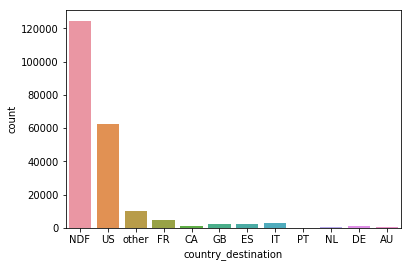

In [4]:
sns.countplot(x='country_destination', data=train_user)

#there  are large number of undefined countries with small other counties
#gender of most is unknown with very small unknown

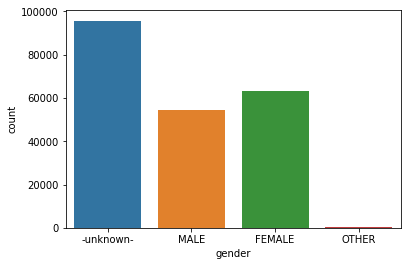

In [5]:
sns.countplot(x='gender' , data=train_user)

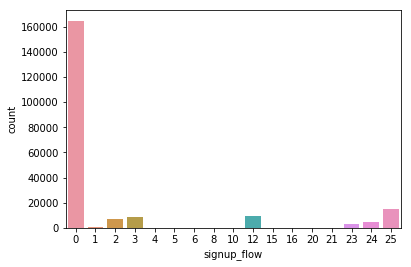

In [6]:
sns.countplot(x='signup_flow' , data=train_user)

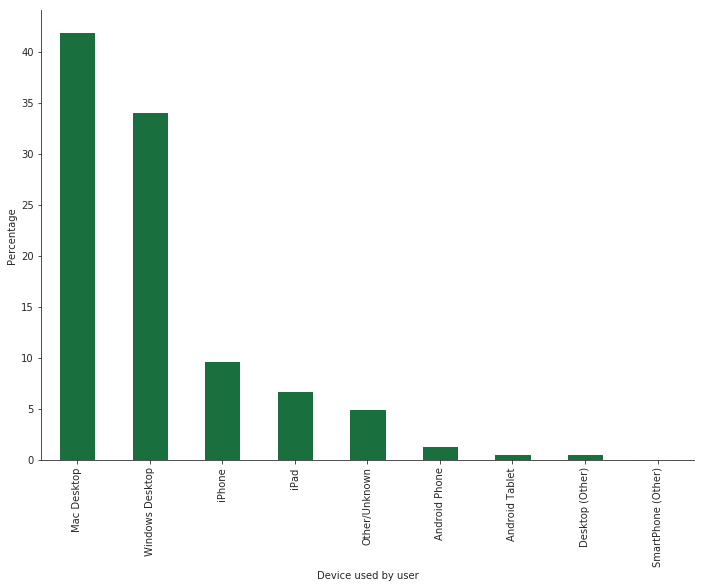

In [7]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = train_user.first_device_type.value_counts() / train_user.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


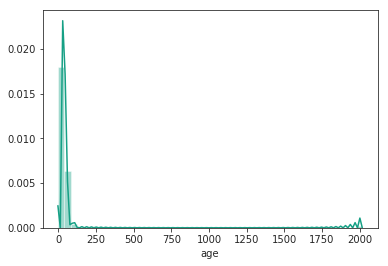

In [8]:
sns.distplot(train_user.age.dropna(), color='#16A085')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


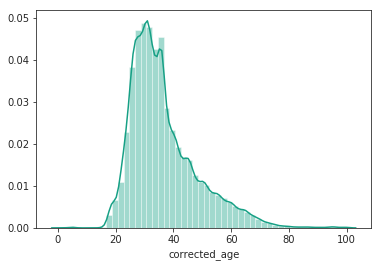

In [9]:
train_user['corrected_age']=train_user['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(train_user.corrected_age.dropna(), color='#16A085')


In [10]:
display((train_user.isnull().sum()/train_user.shape[0])*100)

id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
corrected_age              41.222576
dtype: float64

In [11]:
train_user['date_account_created_new'] = pd.to_datetime(train_user['date_account_created'])
train_user['date_first_active_new'] = pd.to_datetime((train_user.timestamp_first_active // 1000000), format='%Y%m%d')

In [12]:
train_user['date_account_created_day'] = train_user.date_account_created_new.dt.weekday_name
train_user['date_account_created_month'] = train_user.date_account_created_new.dt.month
train_user['date_account_created_year'] = train_user.date_account_created_new.dt.year
train_user['date_first_active_day'] = train_user.date_first_active_new.dt.weekday_name
train_user['date_first_active_month'] = train_user.date_first_active_new.dt.month
train_user['date_first_active_year'] = train_user.date_first_active_new.dt.year

In [13]:
train_user['isequal']=~(train_user['date_account_created_new'] == train_user['date_first_active_new'])
#there are 178 rows whose values are not same for date_account_created adn date_first_active

In [14]:
#display(train_user.loc[train_user['isequal']==True])

In [15]:
#sns.countplot(x='country_destination', data=train_user.loc[train_user['isequal']==False])
#if both value are equal then there are greater changes of travel for value which are equal but 
# 213273 values are same and only 178 rows are different so they are reducible
display(train_user.head())


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,corrected_age,date_account_created_new,date_first_active_new,date_account_created_day,date_account_created_month,date_account_created_year,date_first_active_day,date_first_active_month,date_first_active_year,isequal
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,2010-06-28,2009-03-19,Monday,6,2010,Thursday,3,2009,True
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,38.0,2011-05-25,2009-05-23,Wednesday,5,2011,Saturday,5,2009,True
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,56.0,2010-09-28,2009-06-09,Tuesday,9,2010,Tuesday,6,2009,True
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,42.0,2011-12-05,2009-10-31,Monday,12,2011,Saturday,10,2009,True
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,41.0,2010-09-14,2009-12-08,Tuesday,9,2010,Tuesday,12,2009,True


In [16]:
train_user['isequal'].value_counts()/train_user.shape[0]*100

False    99.916608
True      0.083392
Name: isequal, dtype: float64

In [17]:
train_user['gender'].value_counts()/train_user.shape[0]*100

-unknown-    44.829024
FEMALE       29.534179
MALE         25.504683
OTHER         0.132115
Name: gender, dtype: float64

In [18]:
train_user['signup_method'].value_counts()/train_user.shape[0]*100

basic       71.630960
facebook    28.113244
google       0.255796
Name: signup_method, dtype: float64

In [19]:
train_user['language'].value_counts()/train_user.shape[0]*100

en    96.656375
zh     0.764578
fr     0.549072
es     0.428670
ko     0.349963
de     0.342936
it     0.240805
ru     0.182243
pt     0.112438
ja     0.105411
sv     0.057156
nl     0.045444
tr     0.029983
da     0.027173
pl     0.025299
cs     0.014992
no     0.014055
el     0.011244
th     0.011244
id     0.010307
hu     0.008433
fi     0.006559
ca     0.002342
is     0.002342
hr     0.000937
Name: language, dtype: float64

In [20]:
train_user['affiliate_channel'].value_counts()/train_user.shape[0]*100


direct           64.523942
sem-brand        12.201864
sem-non-brand     8.828256
other             4.198153
seo               4.058543
api               3.826171
content           1.849605
remarketing       0.513467
Name: affiliate_channel, dtype: float64

In [21]:
train_user['affiliate_provider'].value_counts()/train_user.shape[0]*100

direct                 64.382926
google                 24.217736
other                   5.879101
craigslist              1.626134
bing                    1.090648
facebook                1.064881
vast                    0.388380
padmapper               0.359802
facebook-open-graph     0.255328
yahoo                   0.232372
gsp                     0.212227
meetup                  0.162567
email-marketing         0.077770
naver                   0.024362
baidu                   0.013586
yandex                  0.007964
wayn                    0.003748
daum                    0.000468
Name: affiliate_provider, dtype: float64

In [22]:
train_user['first_affiliate_tracked'].value_counts()/train_user.shape[0]*100

untracked        51.174274
linked           21.685071
omg              20.605197
tracked-other     2.884034
product           0.728973
marketing         0.065120
local ops         0.015929
Name: first_affiliate_tracked, dtype: float64

In [23]:
#Dealing with first_afflicated_data and flling with untracked as it has most unfilled data
def definefirstaffiliate(cols):
    if pd.isnull(cols[0]):
        return 'untracked'
    else:
        return cols[0]
    

In [24]:
train_user['first_affiliate_tracked_updated'] = train_user[['first_affiliate_tracked']].apply( definefirstaffiliate , axis = 1) 

In [25]:
train_user['first_affiliate_tracked_updated'].value_counts()/train_user.shape[0]*100
#cleared affiliated data

untracked        54.015676
linked           21.685071
omg              20.605197
tracked-other     2.884034
product           0.728973
marketing         0.065120
local ops         0.015929
Name: first_affiliate_tracked_updated, dtype: float64

In [26]:
#current plan is to drop the date_first_booking
#something to do with age
#thinking maybe predicting the age with logistic regresson can work
#thinking filing them with 36 presently can work
display(train_user.sample(10))

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,corrected_age,date_account_created_new,date_first_active_new,date_account_created_day,date_account_created_month,date_account_created_year,date_first_active_day,date_first_active_month,date_first_active_year,isequal,first_affiliate_tracked_updated
90168,xym4iww9xh,2013-07-11,20130711031349,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,NDF,NaN,2013-07-11,2013-07-11,Thursday,7,2013,Thursday,7,2013,False,untracked
141589,ukcingke2y,2014-01-14,20140114062048,NaN,-unknown-,NaN,basic,24,en,other,email-marketing,tracked-other,Moweb,iPhone,Mobile Safari,NDF,NaN,2014-01-14,2014-01-14,Tuesday,1,2014,Tuesday,1,2014,False,tracked-other
145764,rvxo712v0r,2014-01-25,20140125043200,2014-02-04,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,FR,NaN,2014-01-25,2014-01-25,Saturday,1,2014,Saturday,1,2014,False,untracked
102793,n3iwpr64h7,2013-08-27,20130827171302,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,NDF,NaN,2013-08-27,2013-08-27,Tuesday,8,2013,Tuesday,8,2013,False,linked
186647,nw4q804j8d,2014-05-09,20140509052549,2014-05-14,FEMALE,30.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US,30.0,2014-05-09,2014-05-09,Friday,5,2014,Friday,5,2014,False,untracked
118757,u2nb8yh5d1,2013-10-22,20131022203008,2014-09-11,MALE,30.0,basic,0,es,seo,google,linked,Web,Windows Desktop,Chrome,DE,30.0,2013-10-22,2013-10-22,Tuesday,10,2013,Tuesday,10,2013,False,linked
174410,ozuc1ohlgr,2014-04-11,20140411064518,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,NaN,2014-04-11,2014-04-11,Friday,4,2014,Friday,4,2014,False,untracked
129572,6hbr27ccbj,2013-12-04,20131204005122,2013-12-19,-unknown-,26.0,basic,0,en,seo,facebook,untracked,Web,Mac Desktop,Chrome,US,26.0,2013-12-04,2013-12-04,Wednesday,12,2013,Wednesday,12,2013,False,untracked
64763,rdaxonrge4,2013-03-12,20130312035019,2013-03-13,-unknown-,35.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US,35.0,2013-03-12,2013-03-12,Tuesday,3,2013,Tuesday,3,2013,False,untracked
166070,ckkwupovu9,2014-03-21,20140321203035,2014-03-21,-unknown-,26.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Chrome,other,26.0,2014-03-21,2014-03-21,Friday,3,2014,Friday,3,2014,False,omg


In [27]:
def defineage(cols):
    if pd.isnull(cols[0]):
        return 36
    else:
        return cols[0]
    

In [28]:
train_user['corrected_age'] = train_user[['corrected_age']].apply( defineage , axis = 1) 

In [29]:
display(train_user.sample(15))
#creating dummy variable
gender = pd.get_dummies(train_user['gender'] ,prefix='gender')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,corrected_age,date_account_created_new,date_first_active_new,date_account_created_day,date_account_created_month,date_account_created_year,date_first_active_day,date_first_active_month,date_first_active_year,isequal,first_affiliate_tracked_updated
47155,vy94l70jgr,2012-11-03,20121103070525,2012-11-15,MALE,30.0,basic,0,en,other,other,tracked-other,Web,Windows Desktop,Chrome,US,30.0,2012-11-03,2012-11-03,Saturday,11,2012,Saturday,11,2012,False,tracked-other
173454,0p7q163wrl,2014-04-09,20140409030512,NaN,MALE,45.0,basic,0,en,sem-non-brand,google,omg,Web,iPad,Mobile Safari,NDF,45.0,2014-04-09,2014-04-09,Wednesday,4,2014,Wednesday,4,2014,False,omg
162265,dquf7iqhsx,2014-03-12,20140312050145,NaN,-unknown-,NaN,basic,0,zh,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,36.0,2014-03-12,2014-03-12,Wednesday,3,2014,Wednesday,3,2014,False,untracked
56959,2q709ehhph,2013-01-22,20130122011323,2013-01-25,FEMALE,32.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US,32.0,2013-01-22,2013-01-22,Tuesday,1,2013,Tuesday,1,2013,False,untracked
109901,unw9rs0k9c,2013-09-22,20130922025754,2013-09-28,-unknown-,38.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,38.0,2013-09-22,2013-09-22,Sunday,9,2013,Sunday,9,2013,False,untracked
144919,26e2fubiot,2014-01-22,20140122231809,NaN,-unknown-,NaN,basic,23,en,direct,direct,untracked,Android,Other/Unknown,-unknown-,NDF,36.0,2014-01-22,2014-01-22,Wednesday,1,2014,Wednesday,1,2014,False,untracked
107870,c0l7x0yk0q,2013-09-16,20130916002605,2013-09-26,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US,36.0,2013-09-16,2013-09-16,Monday,9,2013,Monday,9,2013,False,untracked
210119,pyglf5hpqw,2014-06-24,20140624233342,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,36.0,2014-06-24,2014-06-24,Tuesday,6,2014,Tuesday,6,2014,False,linked
42953,u85fkkno5o,2012-09-29,20120929232635,2012-10-03,MALE,45.0,facebook,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,45.0,2012-09-29,2012-09-29,Saturday,9,2012,Saturday,9,2012,False,omg
166587,lq655qdmmv,2014-03-23,20140323061322,2014-03-27,MALE,44.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,IE,other,44.0,2014-03-23,2014-03-23,Sunday,3,2014,Sunday,3,2014,False,omg


In [30]:
gender.sample(5)

,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER
176352,0,0,1,0
183899,0,0,1,0
113193,0,1,0,0
114195,1,0,0,0
109385,1,0,0,0


In [31]:
gender['gender_combine']=(gender['gender_-unknown-']) | (gender['gender_OTHER'])

In [32]:
gender = gender.drop(['gender_-unknown-','gender_OTHER'],axis=1)
gender.sample(10)

,gender_FEMALE,gender_MALE,gender_combine
36228,1,0,0
139030,0,0,1
179030,0,0,1
66023,0,0,1
153556,0,0,1
104673,0,0,1
45051,0,1,0
45442,1,0,0
124906,1,0,0
15081,0,0,1


In [33]:
signup_method = pd.get_dummies(train_user['signup_method'] ,prefix='signup_method')
affiliate_channel = pd.get_dummies(train_user['affiliate_channel'] ,prefix='affiliate_channel')
affiliate_provider = pd.get_dummies(train_user['affiliate_provider'] ,prefix='affiliate_provider')

In [34]:
affiliate_provider.sample(10)

,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex
156656,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
185062,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
119011,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
39900,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
61442,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
22542,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
44451,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
137429,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
52939,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
198308,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
affiliate_provider['affiliate_provider_combine']= affiliate_provider['affiliate_provider_vast'] | affiliate_provider['affiliate_provider_padmapper'] | affiliate_provider['affiliate_provider_facebook-open-graph'] | affiliate_provider['affiliate_provider_yahoo'] | affiliate_provider['affiliate_provider_gsp'] | affiliate_provider['affiliate_provider_meetup'] | affiliate_provider['affiliate_provider_email-marketing']  | affiliate_provider['affiliate_provider_naver'] | affiliate_provider['affiliate_provider_baidu']|affiliate_provider['affiliate_provider_yandex']|affiliate_provider['affiliate_provider_wayn'] | affiliate_provider['affiliate_provider_daum'] 

In [36]:
affiliate_provider = affiliate_provider.drop(['affiliate_provider_vast' , 'affiliate_provider_padmapper' ,'affiliate_provider_facebook-open-graph','affiliate_provider_gsp' , 'affiliate_provider_meetup' , 'affiliate_provider_email-marketing' , 'affiliate_provider_naver' , 'affiliate_provider_baidu' , 'affiliate_provider_yandex' ,'affiliate_provider_wayn' ,'affiliate_provider_daum' ], axis = 1)  
affiliate_provider.sample(10)

,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_direct,affiliate_provider_facebook,affiliate_provider_google,affiliate_provider_other,affiliate_provider_yahoo,affiliate_provider_combine
85554,0,0,1,0,0,0,0,0
156469,0,0,0,0,0,1,0,0
184437,0,0,0,0,1,0,0,0
212668,0,0,1,0,0,0,0,0
53307,0,0,0,0,1,0,0,0
93902,0,0,1,0,0,0,0,0
10940,0,0,1,0,0,0,0,0
185075,0,0,0,0,1,0,0,0
80594,0,0,0,0,1,0,0,0
108286,0,0,1,0,0,0,0,0


In [37]:
first_affiliate_tracked_updated = pd.get_dummies(train_user['first_affiliate_tracked_updated'] ,prefix='first_affiliate_tracked_updated')

In [38]:
first_affiliate_tracked_updated['first_affiliate_tracked_updated_combine'] = first_affiliate_tracked_updated['first_affiliate_tracked_updated_marketing']|first_affiliate_tracked_updated['first_affiliate_tracked_updated_product']|first_affiliate_tracked_updated['first_affiliate_tracked_updated_local ops']

In [39]:
first_affiliate_tracked_updated = first_affiliate_tracked_updated.drop(['first_affiliate_tracked_updated_marketing' , 'first_affiliate_tracked_updated_product' , 'first_affiliate_tracked_updated_local ops'],axis =1)    
first_affiliate_tracked_updated.sample(10)

,first_affiliate_tracked_updated_linked,first_affiliate_tracked_updated_omg,first_affiliate_tracked_updated_tracked-other,first_affiliate_tracked_updated_untracked,first_affiliate_tracked_updated_combine
129055,0,1,0,0,0
2311,0,0,0,1,0
155212,0,0,0,1,0
108873,0,0,0,1,0
156508,0,0,0,1,0
203299,0,0,0,1,0
164440,0,0,0,1,0
68215,0,0,0,1,0
135225,0,0,0,1,0
210135,0,0,0,1,0


In [40]:
signup_app = pd.get_dummies(train_user['signup_app'] ,prefix='signup_app')
first_device_type = pd.get_dummies(train_user['first_device_type'] ,prefix='first_device_type')
# first_browser = pd.get_dummies(train_user['first_browser'] ,prefix='first_browser')

In [41]:
def definefirstbrowser(cols):
    if(cols[0]=='Chrome' or cols[0]=='Safari' or cols[0]=='Firefox' or cols[0]=='-unknown-' or cols[0]=='IE' or cols[0]=='Mobile Safari'):
        return cols[0]
    else:
        return 'Other'

In [42]:
train_user['first_browser_updated'] = train_user[['first_browser']].apply( definefirstbrowser , axis = 1) 

In [43]:
# train_user[train_user['first_browser_updated'] =='Other']
#this is working
#so creating dummy for first_browser_updated
first_browser = pd.get_dummies(train_user['first_browser_updated'] ,prefix='first_browser_updated')

In [44]:
first_browser.sample(5)

,first_browser_updated_-unknown-,first_browser_updated_Chrome,first_browser_updated_Firefox,first_browser_updated_IE,first_browser_updated_Mobile Safari,first_browser_updated_Other,first_browser_updated_Safari
124965,0,0,1,0,0,0,0
96348,0,0,0,0,0,0,1
19442,0,0,1,0,0,0,0
79325,0,0,1,0,0,0,0
71313,0,0,0,0,0,0,1


In [45]:
def languageisenglish(cols):
    if(cols[0] == 'en'):
        return 1
    else:
        return 0

In [46]:
train_user['languageisenglish'] = train_user[['language']].apply( languageisenglish , axis = 1) 

In [47]:
train_user['signup_flow'].value_counts()/train_user.shape[0]*100

0     77.178837
25     6.867618
12     4.370558
3      4.133033
2      3.223691
24     2.027632
23     1.328174
1      0.490511
6      0.141016
8      0.112438
21     0.091824
5      0.016866
20     0.006559
16     0.005153
15     0.004685
10     0.000937
4      0.000468
Name: signup_flow, dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [49]:
train_user['signup_flow_updated'] = ss.fit_transform(train_user[['signup_flow']])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [50]:
#so dummy tables are gender ,signup_method , affiliate_channel ,affiliate_provider ,first_affiliate_tracked_updated 
#signup_app first_device_type first_browser first_browser
train_user_combine = pd.concat([train_user,gender,signup_method,affiliate_channel ,affiliate_provider ,first_affiliate_tracked_updated ,signup_app,first_device_type,first_browser],axis=1)

In [51]:
train_user_combine.sample(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,corrected_age,date_account_created_new,date_first_active_new,date_account_created_day,date_account_created_month,date_account_created_year,date_first_active_day,date_first_active_month,date_first_active_year,isequal,first_affiliate_tracked_updated,first_browser_updated,languageisenglish,signup_flow_updated,gender_FEMALE,gender_MALE,gender_combine,signup_method_basic,signup_method_facebook,signup_method_google,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_direct,affiliate_provider_facebook,affiliate_provider_google,affiliate_provider_other,affiliate_provider_yahoo,affiliate_provider_combine,first_affiliate_tracked_updated_linked,first_affiliate_tracked_updated_omg,first_affiliate_tracked_updated_tracked-other,first_affiliate_tracked_updated_untracked,first_affiliate_tracked_updated_combine,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_browser_updated_-unknown-,first_browser_updated_Chrome,first_browser_updated_Firefox,first_browser_updated_IE,first_browser_updated_Mobile Safari,first_browser_updated_Other,first_browser_updated_Safari
159910,y6ldxnxgla,2014-03-06,20140306001441,2014-07-30,-unknown-,49.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Chrome,US,49.0,2014-03-06,2014-03-06,Thursday,3,2014,Thursday,3,2014,False,omg,Chrome,1,-0.427798,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
173246,jmwan67af9,2014-04-08,20140408185335,2014-04-10,-unknown-,NaN,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,AU,36.0,2014-04-08,2014-04-08,Tuesday,4,2014,Tuesday,4,2014,False,omg,Safari,1,-0.427798,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
90157,mtn74vw696,2013-07-11,20130711020705,NaN,-unknown-,36.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF,36.0,2013-07-11,2013-07-11,Thursday,7,2013,Thursday,7,2013,False,untracked,Safari,1,-0.427798,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
173313,oxwlti5n9r,2014-04-08,20140408205845,NaN,FEMALE,33.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,33.0,2014-04-08,2014-04-08,Tuesday,4,2014,Tuesday,4,2014,False,untracked,Firefox,1,-0.427798,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
182060,chivui95d7,2014-04-29,20140429085812,NaN,FEMALE,32.0,facebook,0,en,sem-brand,google,omg,Web,Mac Desktop,Chrome,NDF,32.0,2014-04-29,2014-04-29,Tuesday,4,2014,Tuesday,4,2014,False,omg,Chrome,1,-0.427798,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
32146,2oq51ah684,2012-07-16,20120716045928,NaN,MALE,NaN,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,NDF,36.0,2012-07-16,2012-07-16,Monday,7,2012,Monday,7,2012,False,linked,Mobile Safari,1,-0.427798,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
201439,vj9t44qg4c,2014-06-08,20140608183113,2014-06-15,-unknown-,58.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,58.0,2014-06-08,2014-06-08,Sunday,6,2014,Sunday,6,2014,False,omg,Chrome,1,-0.427798,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
18433,ek7h9ph6

In [52]:
train_user_combine['date_account_created_year_updated'] =  train_user_combine['date_account_created_year'].apply(lambda x: x%2009 )   

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
lb = LabelEncoder()
lb.fit(train_user_combine['date_account_created_day'])
train_user_combine['date_account_created_day_updated'] = lb.transform(train_user_combine['date_account_created_day'])

In [55]:
ss1 = StandardScaler()
train_user_combine['corrected_age_updated']=ss1.fit_transform(train_user_combine[['corrected_age']])

In [56]:
lb1 = LabelEncoder()
lb.fit(train_user_combine['country_destination'])
train_user_combine['country_destination_updated'] = lb.transform(train_user_combine['country_destination'])

In [57]:
train_user_combine.sample(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,corrected_age,date_account_created_new,date_first_active_new,date_account_created_day,date_account_created_month,date_account_created_year,date_first_active_day,date_first_active_month,date_first_active_year,isequal,first_affiliate_tracked_updated,first_browser_updated,languageisenglish,signup_flow_updated,gender_FEMALE,gender_MALE,gender_combine,signup_method_basic,signup_method_facebook,signup_method_google,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,...,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_direct,affiliate_provider_facebook,affiliate_provider_google,affiliate_provider_other,affiliate_provider_yahoo,affiliate_provider_combine,first_affiliate_tracked_updated_linked,first_affiliate_tracked_updated_omg,first_affiliate_tracked_updated_tracked-other,first_affiliate_tracked_updated_untracked,first_affiliate_tracked_updated_combine,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_browser_updated_-unknown-,first_browser_updated_Chrome,first_browser_updated_Firefox,first_browser_updated_IE,first_browser_updated_Mobile Safari,first_browser_updated_Other,first_browser_updated_Safari,date_account_created_year_updated,date_account_created_day_updated,corrected_age_updated,country_destination_updated
26567,4byn3oiti1,2012-06-05,20120605030600,2012-06-05,-unknown-,57.0,basic,3,en,direct,direct,untracked,Web,Mac Desktop,Safari,US,57.0,2012-06-05,2012-06-05,Tuesday,6,2012,Tuesday,6,2012,False,untracked,Safari,1,-0.035009,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,3,5,2.325289,10
204891,a2macjists,2014-06-15,20140615075611,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,36.0,2014-06-15,2014-06-15,Sunday,6,2014,Sunday,6,2014,False,untracked,-unknown-,1,2.845444,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,5,3,-0.035293,7
151052,fa8fml821n,2014-02-09,20140209204957,2014-10-17,MALE,105.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,36.0,2014-02-09,2014-02-09,Sunday,2,2014,Sunday,2,2014,False,untracked,Chrome,1,-0.427798,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,5,3,-0.035293,10
99185,zt9lf5db0m,2013-08-14,20130814041418,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Desktop (Other),Firefox,NDF,36.0,2013-08-14,2013-08-14,Wednesday,8,2013,Wednesday,8,2013,False,linked,Firefox,1,-0.427798,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4,6,-0.035293,7
159171,zdat7x15i1,2014-03-04,20140304044616,NaN,-unknown-,NaN,basic,24,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,NDF,36.0,2014-03-04,2014-03-04,Tuesday,3,2014,Tuesday,3,2014,False,untracked,Mobile Safari,1,2.714514,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,5,5,-0.035293,7
144966,bo1h2jdfgt,2014-01-23,20140123005753,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,36.0,2014-01-23,2014-01-23,Thursday,1,2014,Thursday,1,2014,False,untracked,-unknown-,1,2.845444,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,5,4,-0.035293,7
117196,ya9zhj4n1d,2013-10-16,20131016031022,NaN,FEMALE,39.0,facebook,0,en,direct,direct,l

**From here we are using the predications **
# Predications

In [58]:
train_user_combine_final = train_user_combine[['date_account_created_month','isequal',
       'languageisenglish', 'signup_flow_updated', 'gender_FEMALE',
       'gender_MALE', 'gender_combine', 'signup_method_basic',
       'signup_method_facebook', 'signup_method_google',
       'affiliate_channel_api', 'affiliate_channel_content',
       'affiliate_channel_direct', 'affiliate_channel_other',
       'affiliate_channel_remarketing', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_channel_seo',
       'affiliate_provider_bing', 'affiliate_provider_craigslist',
       'affiliate_provider_direct', 'affiliate_provider_facebook',
       'affiliate_provider_google', 'affiliate_provider_other',
       'affiliate_provider_yahoo', 'affiliate_provider_combine',
       'first_affiliate_tracked_updated_linked',
       'first_affiliate_tracked_updated_omg',
       'first_affiliate_tracked_updated_tracked-other',
       'first_affiliate_tracked_updated_untracked',
       'first_affiliate_tracked_updated_combine', 'signup_app_Android',
       'signup_app_Moweb', 'signup_app_Web', 'signup_app_iOS',
       'first_device_type_Android Phone', 'first_device_type_Android Tablet',
       'first_device_type_Desktop (Other)', 'first_device_type_Mac Desktop',
       'first_device_type_Other/Unknown',
       'first_device_type_SmartPhone (Other)',
       'first_device_type_Windows Desktop', 'first_device_type_iPad',
       'first_device_type_iPhone', 'first_browser_updated_-unknown-',
       'first_browser_updated_Chrome', 'first_browser_updated_Firefox',
       'first_browser_updated_IE', 'first_browser_updated_Mobile Safari',
       'first_browser_updated_Other', 'first_browser_updated_Safari',
       'date_account_created_year_updated', 'date_account_created_day_updated',
       'corrected_age_updated', 'country_destination_updated']]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [60]:
t_train , t_test , s_train , s_test = train_test_split(train_user_combine_final.drop('country_destination_updated',axis=1),train_user_combine_final['country_destination_updated'] , test_size = 0.20 , random_state=101 )  

In [61]:
rfc = RandomForestClassifier()
rfc.fit(t_train , s_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
pred = rfc.predict(t_test)

In [63]:
print(accuracy_score(s_test, pred))

0.5686444449649809


In [64]:
dtc = DecisionTreeClassifier()
dtc.fit(t_train , s_train)
pred = dtc.predict(t_test)
print(accuracy_score(s_test, pred))

0.5204375629523788


In [65]:
pred

array([10,  7, 10, ...,  7,  7,  7])

In [67]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.03, n_estimators=22,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=40)
xgb.fit(t_train , s_train)
pred = xgb.predict(t_test) 
print(accuracy_score(s_test, pred))

0.6266426178819892
